# Logistic Regression with Gradient Descent

In this notebook, we will analyse the mechanisms being Logistic Regression & implement the algorithm from scratch <br>
Logistic Regression is used as a technique for binary classification.  <br>
It uses a sigmoid function to predict a probability which can then be used to map into discrete classes



The inbuilt dataset "Iris" will be used here <br>
We will also model using a library defined implementation
### Objective
Binary Classification of Iris into separate classes according to the parameters: 
sepal length, sepal width, petal length, petal width (cm)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df["target"] = iris.target
iris_df = iris_df[~(iris_df["target"]).isin([2])].copy()

In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_df['target'].value_counts()

1    50
0    50
Name: target, dtype: int64

In [5]:
train = iris_df.loc[:75,:]
test = iris_df.loc[75:,:]
X_train = train.iloc[:, :-1]
y_train = train[['target']]
X_test =  test.iloc[:, :-1]
X_test1 =  test.iloc[:, :-1]
y_test = test[['target']]
y_test1 = test[['target']]

In [6]:
# Define the sigmoid function: y = 1/(1 + e^(-x))
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [7]:
# Define th function to calculate the cost to be minimized
def cal_cost(b,X,y):
    df = X_train.copy()
    m=len(X)
    yp = np.dot(X,b)
    
    df["pred"]=yp
    df["y"] = y
    df["cost"] = np.where(df.y==0, (-(np.log(1-df["pred"]))), (-np.log(df["pred"])))
    
    cost = -(1/m) * np.sum(df["cost"])
    return cost

In [8]:
def logistic(X, y, lr, b, df):
    x0 = np.ones((X.shape[0], 1))
    X=np.hstack((x0, X))
    m=len(X)    
    
    z=np.dot(X,b)
    yp = sigmoid(z)
    
    diff=yp-y
    gradient=np.dot(X.T,diff)
    val=(lr*gradient)*(1/m)   
    b=b-val.T    
    b=[b[0][0], b[0][1], b[0][2], b[0][3], b[0][4]]    
    
    c=cal_cost(b,X,y)    
    df.loc[len(df)] = [b, c]  
    
    return b    

In [9]:
def gradient(X, y, b, lr, epochs, df):
    
    for i in range(epochs):
        b = logistic(np.array(X),np.array(y), lr, b, df)
        
    return b

In [10]:
# yp = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4
lr = 0.001
epochs = 2000
b=[0, 0, 0, 0, 0]
df = pd.DataFrame(columns=['Coefficients','cost'])

b = gradient(X_train, y_train, b, lr, epochs, df)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


In [11]:
df.loc[df["cost"] == df["cost"].min()]

,Coefficients,cost
307,"[-0.02255789524561934, -0.049557842061154905, ...",-0.79255


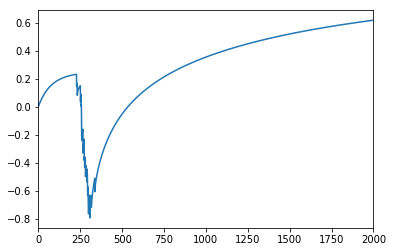

In [12]:
df["cost"].plot()

In [13]:
X_test.columns = ["sepal_l", "sepal_w", "petal_l", "petal_w"]
b0=df.loc[df["cost"] == df["cost"].min(), "Coefficients"].item()[0]
b1=df.loc[df["cost"] == df["cost"].min(), "Coefficients"].item()[1]
b2=df.loc[df["cost"] == df["cost"].min(), "Coefficients"].item()[2]
b3=df.loc[df["cost"] == df["cost"].min(), "Coefficients"].item()[3]
b4=df.loc[df["cost"] == df["cost"].min(), "Coefficients"].item()[4]
X_test["pred"] = b0 + X_test["sepal_l"]*b1 + X_test["sepal_w"]*b2 + X_test["petal_l"]*b3 + X_test["petal_w"]*b4
X_test["probability"] = sigmoid(X_test["pred"])
X_test["Class"] = np.where(X_test.probability>0.5, 1, 0)

In [14]:
X_test.head()

,sepal_l,sepal_w,petal_l,petal_w,pred,probability,Class
75,6.6,3.0,4.4,1.4,0.016927,0.504232,1
76,6.8,2.8,4.8,1.4,0.087293,0.521809,1
77,6.7,3.0,5.0,1.7,0.116269,0.529034,1
78,6.0,2.9,4.5,1.5,0.078777,0.519684,1
79,5.7,2.6,3.5,1.0,-0.045348,0.488665,0


In [15]:
print ("Coefficients for min cost: ", df.loc[df["cost"] == df["cost"].min(), "Coefficients"].item())

Coefficients for min cost:  [-0.02255789524561934, -0.049557842061154905, -0.11612200993900577, 0.14263238103031953, 0.06239312987792836]


In [16]:
print ("accuracy score:", accuracy_score(y_test, X_test["Class"]) * 100 )

accuracy score: 88.0


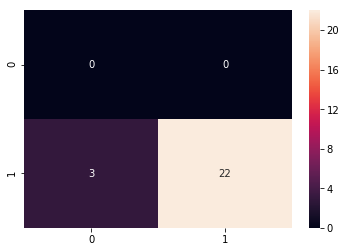

In [17]:
cfm = confusion_matrix(y_test, X_test["Class"])
sns.heatmap(cfm, annot = True);

#### Library Implementation

Implement using LogisticRegression from sklearn

In [18]:
clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(X_train, y_train)
pred = clf.predict(X_test1)

print (clf.intercept_, clf.coef_)

[-0.96670993] [[-1.54191877 -4.51612537  7.33457378  3.36269774]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
print ("accuracy score:", accuracy_score(y_test, pred) * 100  ) 

accuracy score: 100.0


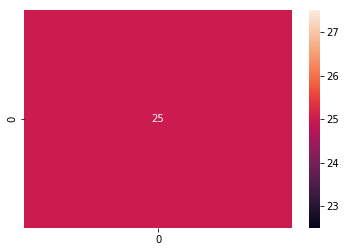

In [20]:
cfm1 = confusion_matrix(y_test, pred)
sns.heatmap(cfm1, annot = True);